<a href="https://colab.research.google.com/github/kkapturek/Analiza_Serce/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_df = pd.read_csv('drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# find null values
data_df.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# get mean of bmi
bmi_mean = data_df['bmi'].mean().round(2)

In [ ]:
bmi_mean

28.89

In [ ]:
# fill empty values in bmi column with bmi mean
data_df['bmi'].fillna(bmi_mean, inplace=True)

In [ ]:
data_df.isnull().sum().sort_values(ascending=False)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [ ]:
# drop id column
data_df.drop('id', axis=1, inplace=True)

In [ ]:
# check age values
data_df['age'].sort_values()

3295     0.08
1614     0.08
3618     0.16
4021     0.16
3968     0.16
        ...  
4590    82.00
4094    82.00
2341    82.00
4716    82.00
187     82.00
Name: age, Length: 5110, dtype: float64

In [ ]:
data_df['age'] = pd.cut(data_df['age'], bins=[0,12,20,40,120],  labels=['Child', 'Teenage', 'Adult', 'Elder'])
data_df['bmi'] = pd.cut(data_df['bmi'], bins=[0,18.5,25,30,40,80],  labels=['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity'])

In [ ]:
data_df['avg_glucose_level'].sort_values()

4886     55.12
1191     55.22
4110     55.23
682      55.25
772      55.26
         ...  
2462    266.59
4983    267.60
3088    267.61
1207    267.76
193     271.74
Name: avg_glucose_level, Length: 5110, dtype: float64

In [ ]:
data_df['avg_glucose_level'] = pd.cut(data_df['avg_glucose_level'], bins=[0,100,125,300],  labels=['normal', 'prediabetes', 'diabetes'])

In [ ]:
data_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Elder,0,1,Yes,Private,Urban,diabetes,obesity,formerly smoked,1
1,Female,Elder,0,0,Yes,Self-employed,Rural,diabetes,overweight,never smoked,1
2,Male,Elder,0,1,Yes,Private,Rural,prediabetes,obesity,never smoked,1
3,Female,Elder,0,0,Yes,Private,Urban,diabetes,obesity,smokes,1
4,Female,Elder,1,0,Yes,Self-employed,Rural,diabetes,healthy range,never smoked,1


In [ ]:
# check distinct values in columns
data_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
data_df['hypertension'].unique()

array([0, 1])

In [ ]:
data_df['heart_disease'].unique()

array([1, 0])

In [ ]:
data_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
data_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
data_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
# get the number of values where smoking_status is 'Unknown'
data_df.loc[data_df['smoking_status'] == 'Unknown'].shape[0]

1544

In [ ]:
# drop smoking_status column
data_df.drop('smoking_status', axis=1, inplace=True)

In [ ]:
## convert text values to numerical values with one-hot encoding method
data_df=pd.get_dummies(data_df, columns=['gender','age','ever_married','work_type','Residence_type', 'avg_glucose_level', 'bmi'],
                        prefix=['gender','age','ever_married','work_type','Residence_type', 'avg_glucose_level', 'bmi'])

In [ ]:
data_df.head()

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,age_Child,age_Teenage,age_Adult,age_Elder,...,Residence_type_Rural,Residence_type_Urban,avg_glucose_level_normal,avg_glucose_level_prediabetes,avg_glucose_level_diabetes,bmi_underweight,bmi_healthy range,bmi_overweight,bmi_obesity,bmi_severe obesity
0,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data_df['stroke']
x = data_df.drop('stroke', axis=1)

In [ ]:
# splitting data
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
def model_stroke():
    model = models.Sequential()
    model.add(layers.Dense(units=30, activation='relu', input_shape=(26,)))
    model.add(layers.Dense(units=26, activation='relu'))
    model.add(layers.Dense(units=14, activation='relu'))
    model.add(layers.Dense(units=7, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model_stroke()

In [ ]:
history = model.fit(trainX, trainY, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
327/327 [==============================] - 2s 3ms/step - loss: 0.2328 - accuracy: 0.9352 - val_loss: 0.1620 - val_accuracy: 0.9572
Epoch 2/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1764 - accuracy: 0.9489 - val_loss: 0.1560 - val_accuracy: 0.9572
Epoch 3/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9489 - val_loss: 0.1535 - val_accuracy: 0.9572
Epoch 4/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1716 - accuracy: 0.9489 - val_loss: 0.1530 - val_accuracy: 0.9572
Epoch 5/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9489 - val_loss: 0.1518 - val_accuracy: 0.9572
Epoch 6/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9489 - val_loss: 0.1505 - val_accuracy: 0.9572
Epoch 7/20
327/327 [==============================] - 1s 2ms/step - loss: 0.1681 - accuracy: 0.9489 - val_loss: 0.1515 - val_accuracy: 0.9572
Epoch 

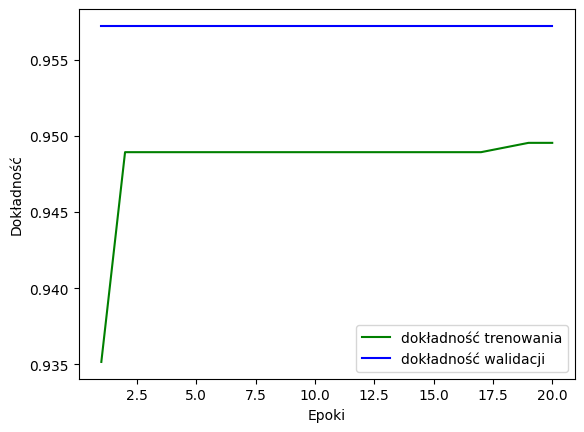

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.plot(range(1, 21), accuracy, 'g', label='dokładność trenowania')
plt.plot(range(1, 21), val_accuracy, 'b', label='dokładność walidacji')
plt.legend()
plt.show()

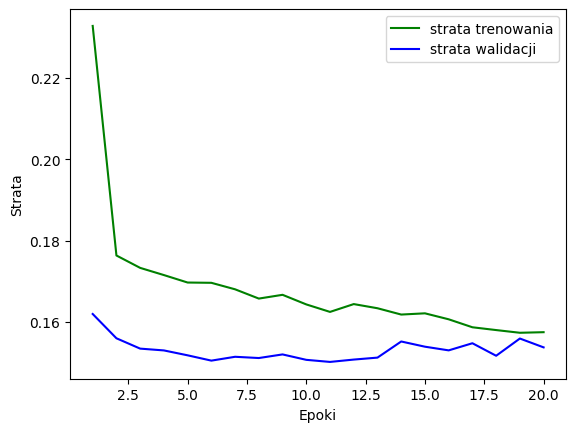

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.plot(range(1,21), loss, 'g', label='strata trenowania')
plt.plot(range(1, 21), val_loss, 'b', label='strata walidacji')
plt.legend()
plt.show()

In [ ]:
pred=model.predict(testX)

32/32 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred

array([[3.5920817e-02],
       [1.6248196e-01],
       [1.1007478e-01],
       ...,
       [2.2379433e-07],
       [3.2190258e-07],
       [3.6941364e-02]], dtype=float32)

In [ ]:
for i in range(len(pred)):
    if pred[i] < 0.5:
        pred[i] = 0
    else:
        pred[i] = 1

In [ ]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(accuracy_score(testY, pred))

0.9540117416829745
